Импортим всякое

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import seaborn_image as isns
import warnings
warnings.simplefilter('ignore')

Открываем наши драгоценные данные

In [2]:
df = pd.read_csv('11K.csv')

Чистим

In [3]:
df_replaced = df.replace(-1,np.nan)
df_replaced = df_replaced.replace("-1",np.nan)
df_replaced = df_replaced.replace(-1.0,np.nan)
df_replaced = df_replaced.replace("-1.0",np.nan)
df_replaced.to_csv("cleaned_11K.csv", index=False)

Открываем чистейшие и крутые данные

In [12]:
df = pd.read_csv('cleaned_11K.csv')
dash_info = pd.read_csv('dash_info_fourth.csv')
dash_info.sort_values(["price_for_meter"], axis=0, ascending=[False], inplace=True)

Далее осталось курить анашу

Теперь раскажу и покажу откуда готовились данные для верхнего графика

In [ ]:
list_of_cities = df['location'].unique()

def price_for_meter(location):
    city = df[df['location']==location]
    city_price = city['price'].sum()

    cleaned_data = [x.replace("м²", "").strip() for x in city['total_meters']]
    cleaned_data = [x.replace("-1", "0").strip() for x in cleaned_data]
    cleaned_data = [x.replace("���", "0").strip() for x in cleaned_data]
    cleaned_data = pd.to_numeric([x.replace(",", ".").strip() for x in cleaned_data]).sum() # здесь в 4 строчки мы максимально просто
                                                                                            # сортируем данные по квадратам квартир

    return round(city_price/cleaned_data,2)

with open("dash_info_fourth.csv", 'w', newline='', encoding='UTF-8') as csvfile:
    fieldnames = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for city in list_of_cities:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

И всё, данные для графика готовы

Выводим графиксы для умного виду

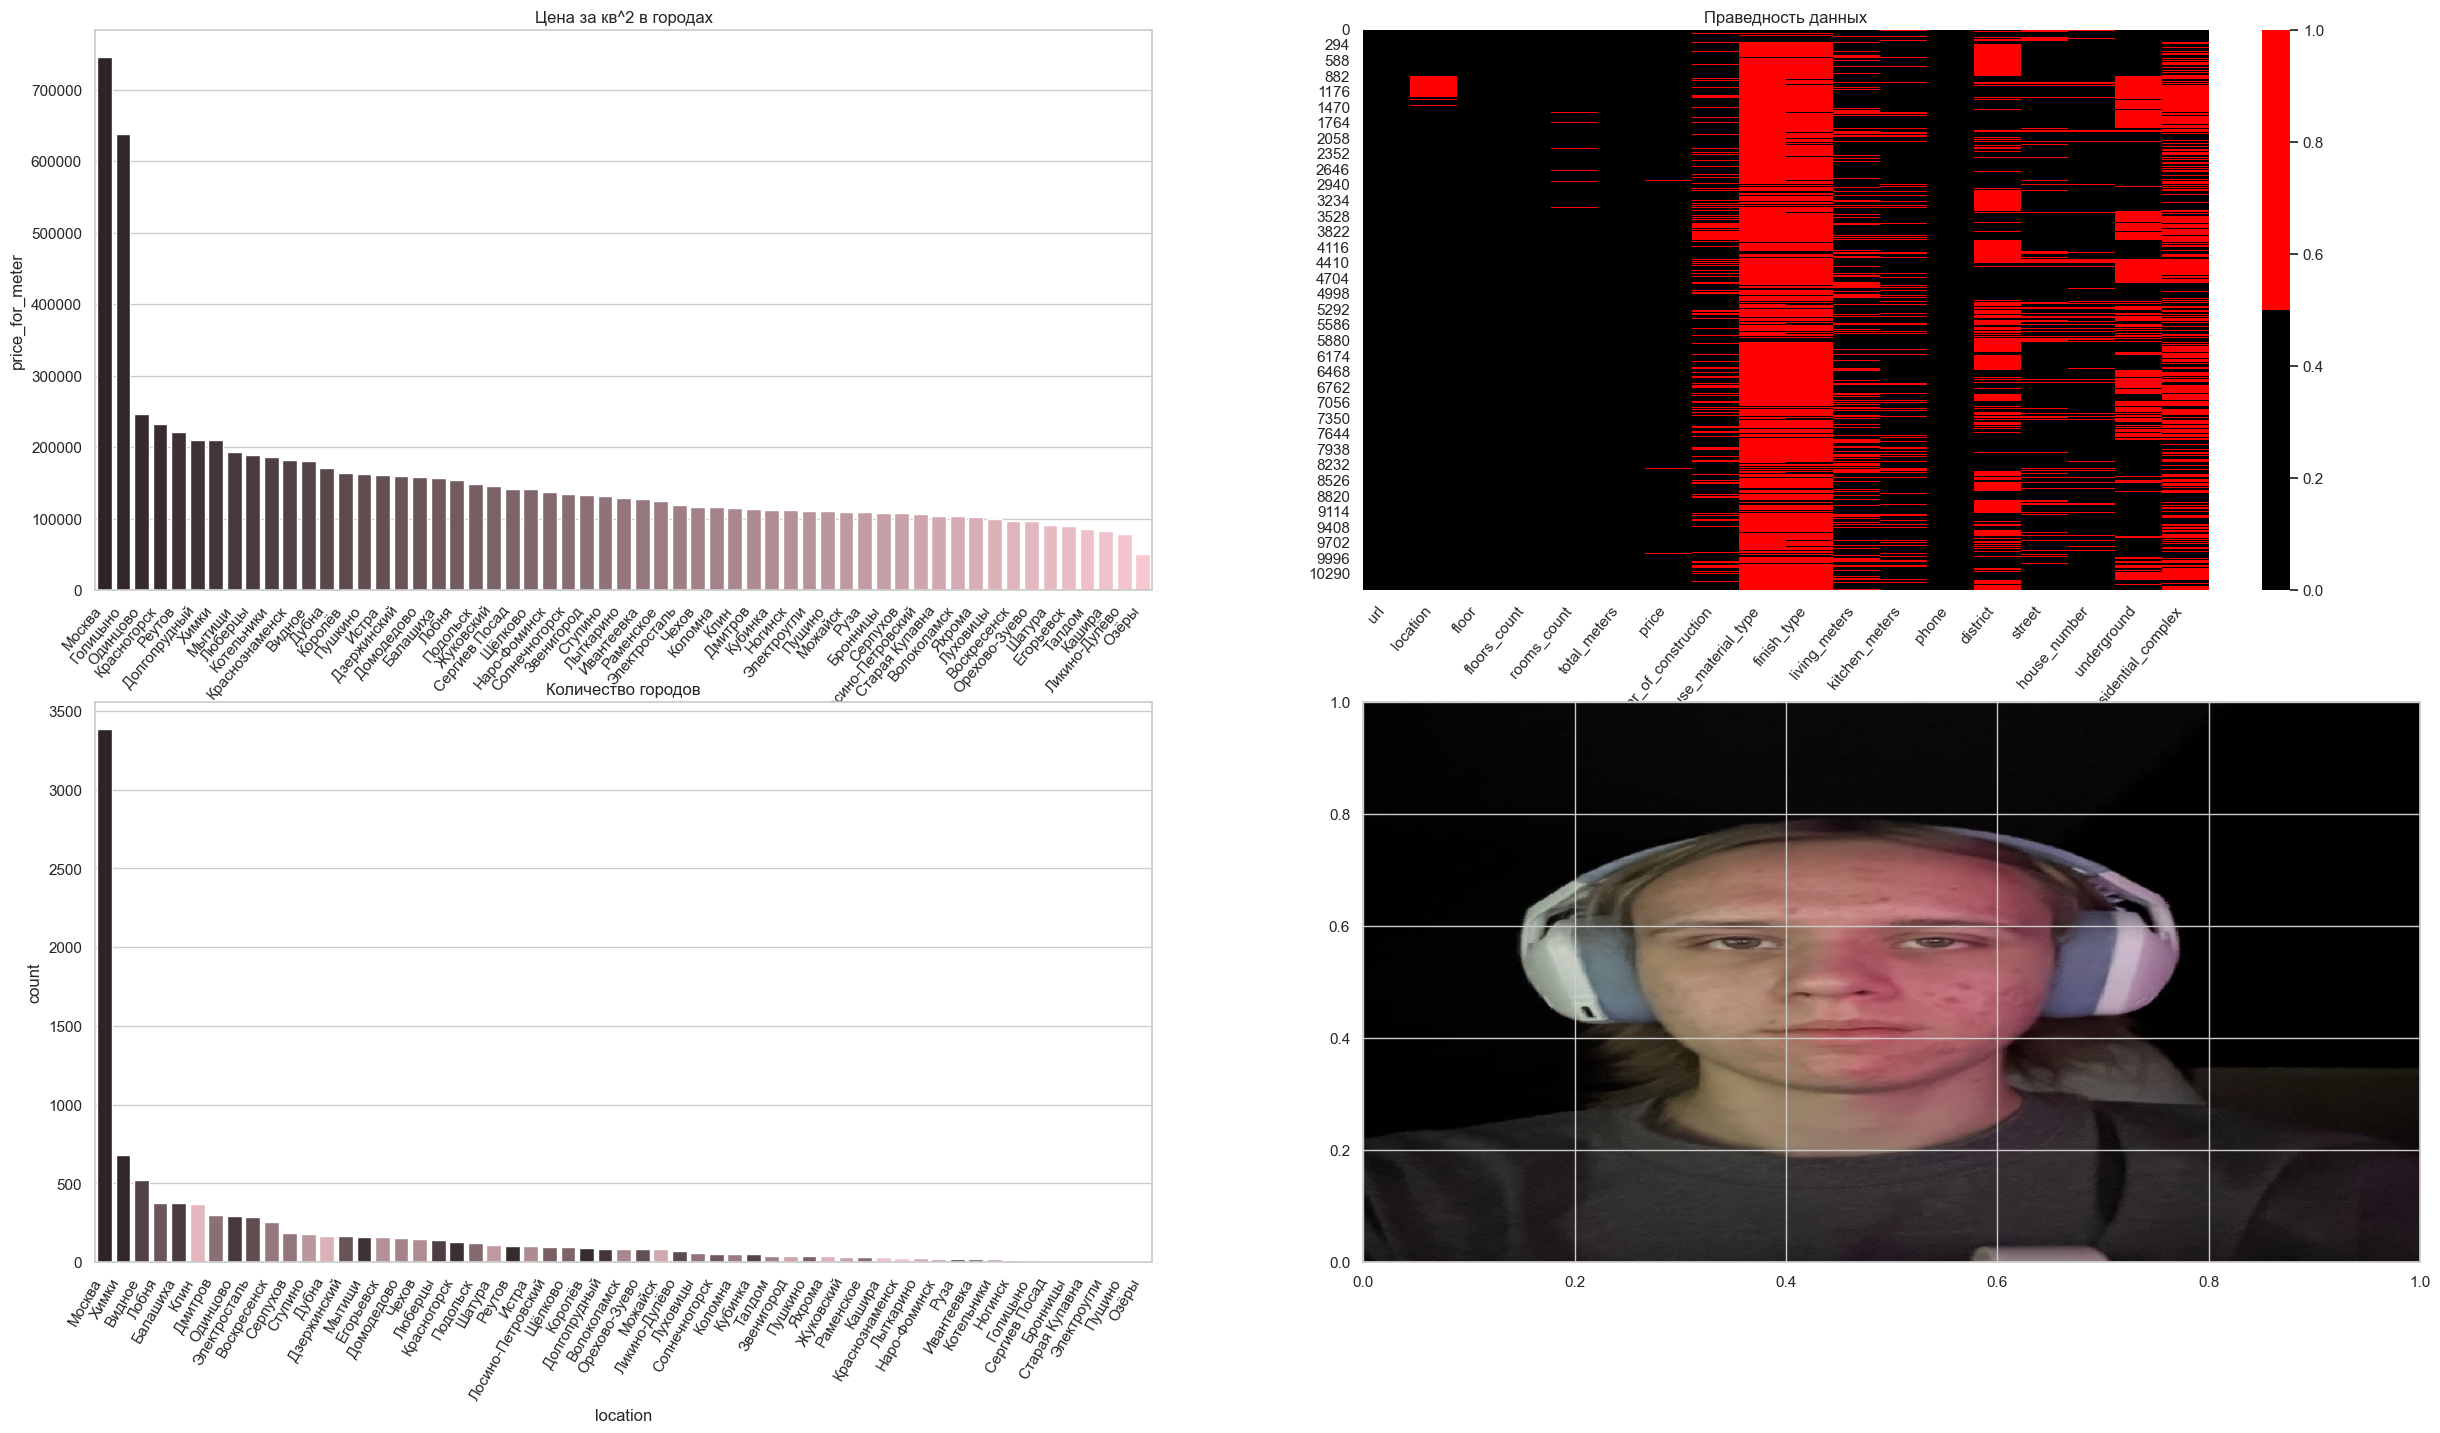

In [14]:
figs, axs = plt.subplots(2,2, figsize=(30,16))

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=dash_info, ax=axs[0,0], palette='dark:pink')
axs[0,0].set_title('Цена за кв^2 в городах')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=50, ha='right')

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.countplot(x='location', hue='location', legend=False, data=df, ax=axs[1,0], order=df['location'].value_counts().index, palette='dark:pink')
axs[1,0].set_title('Количество городов')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=60, ha='right')

colours = ['#000000', '#ff0000'] 
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours), ax=axs[0,1])
axs[0,1].set_title('Праведность данных')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=50, ha='right')

bg_img = plt.imread('photo_2024-10-27_22-58-38.jpg')
axs[1,1].imshow(bg_img, extent=[0, 1, 0, 1], aspect='auto')

plt.show()